## 1. Challenge - Distributions
#### Calculate and plot the distribution of:
1. taxa by plot
2. taxa by sex by plot

In [10]:
import pandas as pd
surveys_df = pd.read_csv('surveys.csv')
species_df = pd.read_csv('species.csv')
plots_df   = pd.read_csv('plots.csv')

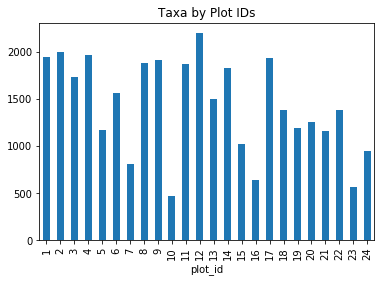

In [14]:
%matplotlib inline 
pd.merge(surveys_df,species_df, how ='left').groupby('plot_id').count()['taxa'].plot(kind='bar', title = 'Taxa by Plot IDs')

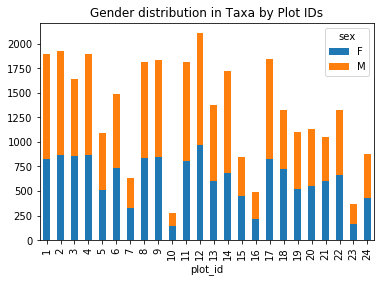

In [16]:
pd.merge(surveys_df,species_df, how ='left').groupby(['plot_id','sex']).count()['taxa'].unstack().plot(kind='bar', stacked=True,
                                                                                                       title = 'Gender distribution in Taxa by Plot IDs')

## 2. Challenge - Diversity Index
1. Summarize number of plots by plot type
2. Calculate diversity index for plots

In [17]:
Combined_df = pd.merge(surveys_df,species_df, how ='left')
Combined_df = pd.merge(Combined_df,plots_df, how ='left')
Combined_df.groupby('plot_type').count()['plot_id']

plot_type
Control                      15660
Long-term Krat Exclosure      5259
Rodent Exclosure              4744
Short-term Krat Exclosure     5955
Spectab exclosure             3931
Name: plot_id, dtype: int64

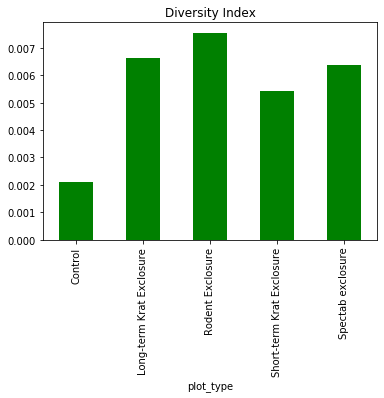

In [38]:
DI_df = pd.merge(Combined_df.groupby('plot_type').nunique()['species'], 
                 Combined_df.groupby('plot_type').count()['species_id'], left_index = True, right_index = True)
DI_df['diversity'] = DI_df['species']/DI_df['species_id']
DI_df['diversity'].plot(kind = 'bar', title = 'Diversity Index', color = 'green')

## 3. Slicing and plotting from multi-index

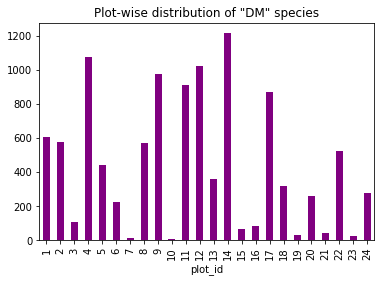

In [35]:
surveys_df.groupby(['plot_id','species_id']).count()['record_id'].loc[ (slice(None),'DM')].plot(kind = 'bar',
                                                                                                title = 'Plot-wise distribution of "DM" species', color = "purple")